## Notebook 6 – Constitutive law for solids

#### Today's exercise is to understand the constitutive law for solid materials.

#### _Purpose of today's exercise_

The goals are to:

* write functions that output strain and stress tensor components

* interpret the meaning of components of strain $\mathbf{\epsilon}$ and stress $\mathbf{\sigma}$

> **NOTE**
> 
> It may be helpful to right-click the notebook tab in JupyterLab and select "New View for Notebook" if you want to view the instructions and code cells side-by-side instead of scrolling.

> **TEXTBOOK**
> 
> If you are following the textbook _Introduction to Continuum Mechanics_, the notation for stress tensor is instead $\mathbf{T}$ and the notation for infinitesimal strain tensor is instead $\mathbf{E}$. The pages related to lecture this week are p. 201-211 and following.

> **Exercises 4 and 5** and strictly optional. You don't have to turn them in today, but they may be useful plotting displacement, strain, or stress fields for your final project's bonus section, if you choose. The rest of the notebook is a completion grade, as usual.

#### _Contents_

[**Deformation field – Calculate strain**](#deformation)

[**Strain field**](#strain)

[**Stress field**](#stress)

[**Interpretation**](#plots)



#### _Submission format_

Please submit the result of your exercises by 

> * Download the notebook to your computer **as a PDF (.pdf) file**.
> 
>   **File > Export notebook as... > Export notebook to PDF**
> 
> * Upload the notebook to the Jupyter Notebook 6 assignment in Moodle.

Don't forget to complete the interactive question (1) at the end before submitting.

---

This week we learned the **constitutive law** for a continuum body.

> **WHAT IS A CONSTITUTIVE LAW?**
> 
> A **constitutive law** says how much stress, $\sigma(x, y, z)$, you should expect in a body when you apply a certain strain (or deform the body), $\epsilon(x, y, z)$. 
> It can also be said in the opposite sense: A constitutive law says what kind of strain field $\epsilon(x, y, z)$ you should expect when you apply a certain stress $\sigma(x, y, z)$ to a material.

**1D constitutive law**

You have seen such a constitutive law through Hooke's law for a spring, written

\begin{equation*}
F = k \Delta x,
\end{equation*}

which gives the **force** $F$ (analogous to stress) per unit **elongation** $\Delta x$ (analogous to strain) of a spring.

**Continuum constitutive law**

The **stress-strain relationship** or **constitutive law** for a continuum body gives the **stress** $\sigma$ per unit **strain** $\epsilon$ in the material. It's written

\begin{equation*}
\sigma_{ij} = C_{ijkl} \epsilon_{kl},
\end{equation*}

which indeed relates each stress component $\sigma_{ij}$ to each strain component $\epsilon_{kl}$ by a constant coefficient $C_{ijkl}$ – a linear relationship.

**Linearly elastic homogeneous isotropic constitutive law**

We showed that for a (1) linearly elastic, (2) homogeneous, and (3) isotropic material, the constitutive law can be made more specific

\begin{equation*}
\mathbf{\sigma} = \lambda Tr(\mathbf{\epsilon}) \mathbf{I} + 2 \mu \mathbf{\epsilon}
\end{equation*}

where $\lambda$ and $\mu$ are 2 unknown constants, given by the material, and 

> $\mathbf{\sigma}$ is the stress tensor,
>
> $\mathbf{\epsilon}$ is the infinitesimal strain tensor, and
>
> $\mathbf{I}$ is the identity tensor.

In indicial notation, it is

\begin{equation*}
\sigma_{ij} = \lambda \epsilon_{kk} \delta_{ij} + 2 \mu \epsilon_{ij}.
\end{equation*}

If a deformation field is given as

\begin{equation*}
\mathbf{u}(x_1, x_2, x_3) = 
\begin{bmatrix}
u_1(x_1, x_2, x_3) \\
u_2(x_1, x_2, x_3) \\
u_3(x_1, x_2, x_3)
\end{bmatrix}
\end{equation*}

then the **infinitesimal strain tensor** $\mathbf{\epsilon}$ with components $\epsilon_{ij}$ can be calculated as

\begin{equation*}
\epsilon_{ij} = \frac{1}{2} \left(\frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i} \right)
\end{equation*}

----

**Physical system**

These exercises can be applied in general – for example, to your project. However, to be more concrete, we consider a **titanium block with dimensions 0.30 $\times$ 0.50 $\times$ 0.15 m$^3$.**

♫ 

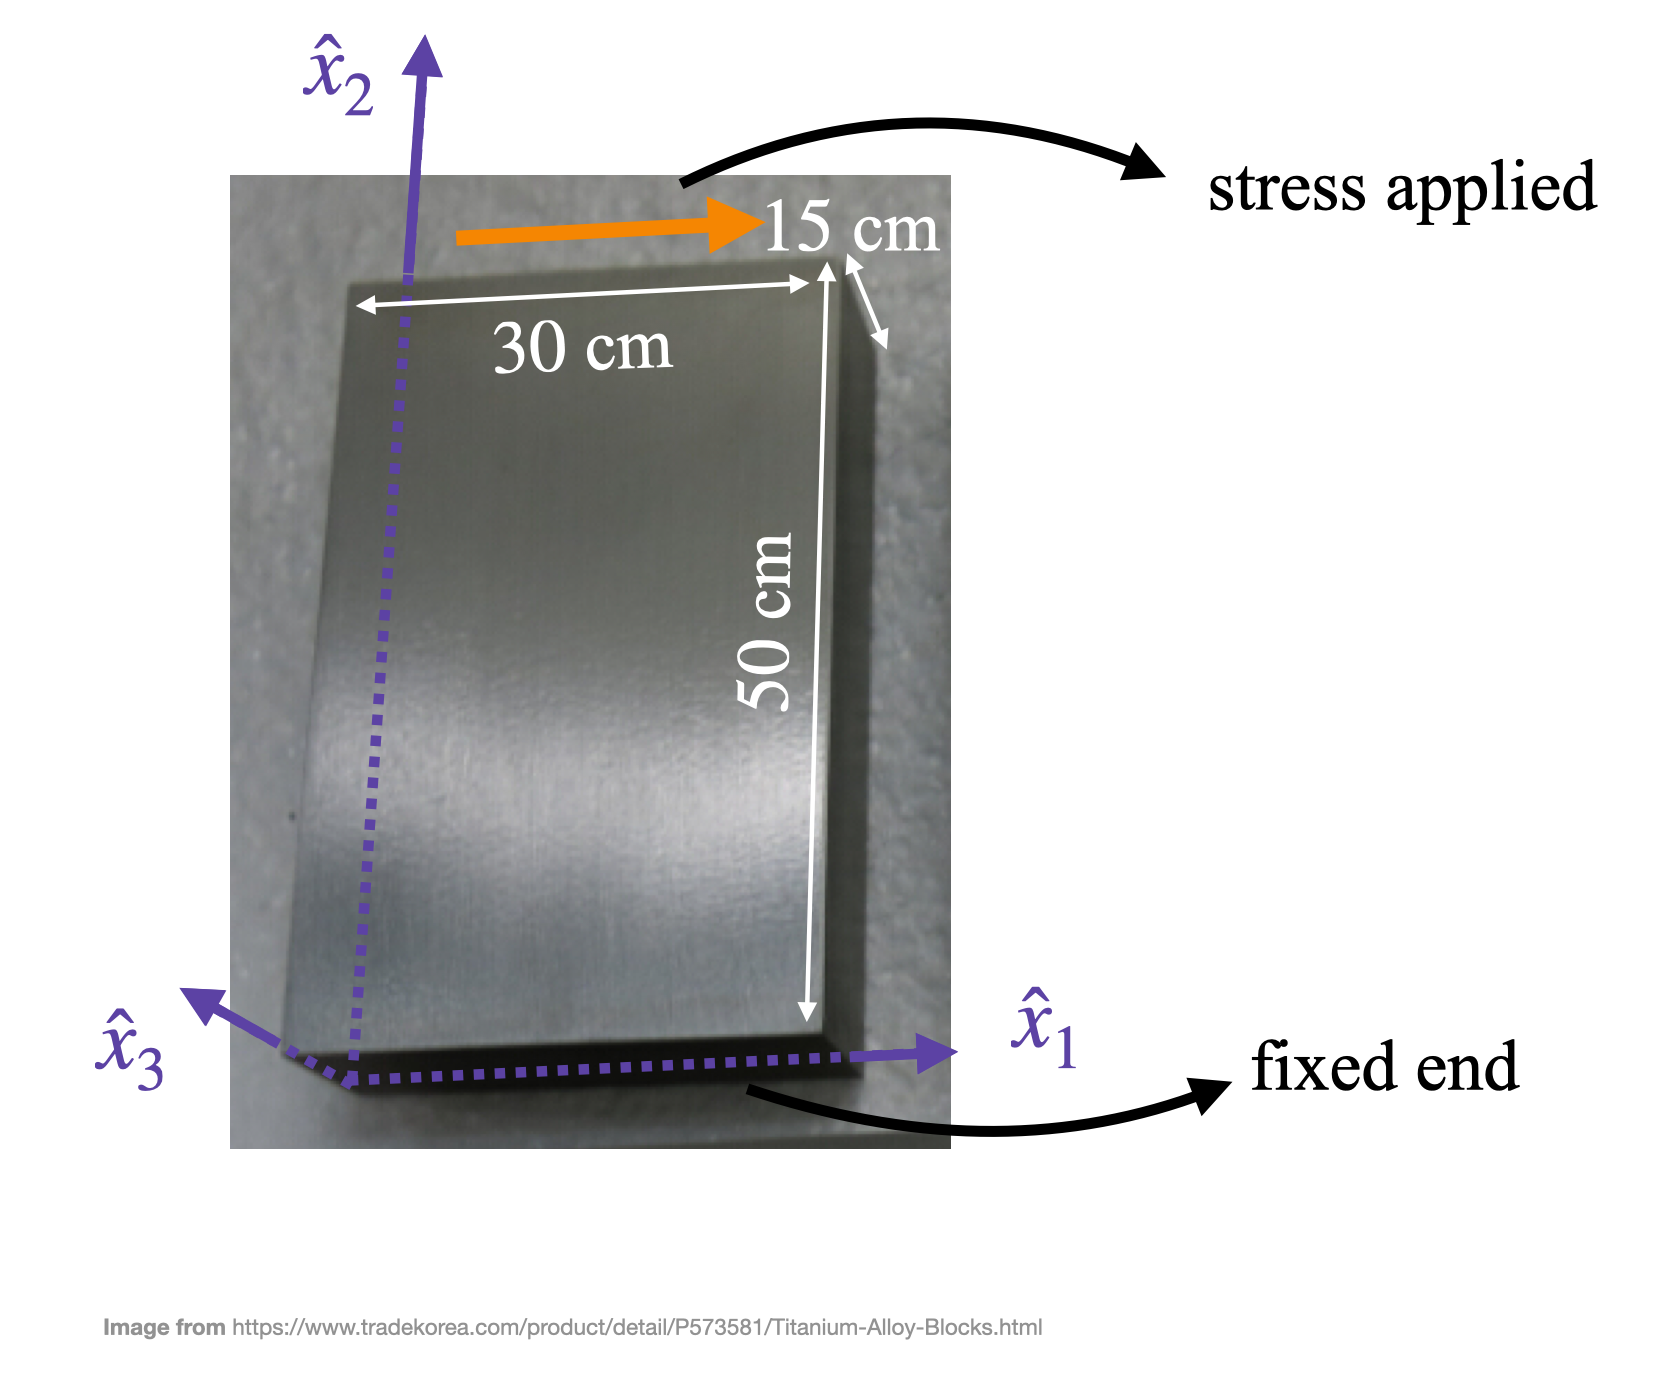

In [1]:
from IPython.display import Image
Image(filename='titaniumblock.png')

**Exercise 0**

**We will need 2 packages for this exercise.**

> Import the packages specified in the code cell below.

Import `numpy` as `np`.

Import `matplotlib.pyplot` as `plt`.

In [1]:
# your imports here


<a id='deformation'><a>
### Deformation field

**Exercise 1**: A simple shear deformation field.

Given a deformation field 

\begin{equation*}
\mathbf{u}(x_1, x_2, x_3) = 
\begin{bmatrix}
k x_2 \\
0 \\
0
\end{bmatrix}
\end{equation*}

calculate all the components $\epsilon_{ij}$  of the **infinitesimal strain tensor** $\mathbf{\epsilon}$ (by hand). Write the final answer in matrix form using LaTex below. Refer to **Notebooks 1 and 2** if you don't recall how to write a matrix. 

---

... your answer here ...

---

<a id='strain'><a>
### Strain field

**Exercise 2**

**a)** Define a function 
```python
def epsilon(k, x1, x2, x3):
    # your function here
``` 
which takes in the positions `x`, `y`, and `z` and outputs the components $\epsilon_{ij}$ that you calculated in **Exercise 1** as a **matrix** (`np.ndarray`). (Refer to **Notebook 4** to recall how to represent matrices in Python.)

Your result should be such that if you write `E = epsilon(x1=..., x2=..., x3=...)`, for some values of `x1`, `x2`, `x3`, then 
* `E[0, 0]` gives the $\epsilon_{11}$ component of the matrix,
* `E[0, 1]` gives the $\epsilon_{12}$ component of the matrix,
* `E[0, 2]` gives the $\epsilon_{13}$ component of the matrix,
* `E[1, 0]` gives the $\epsilon_{21}$ component of the matrix,
* ... etc.

Remember that Python indexing starts at `0, 1, 2, 3, ...` instead of `1, 2, 3, 4, ...`

_Note:_ `lambda` has a specific meaning in Python, which is why we avoid it and use `lam` as the variable instead.

_Hint:_ Your output **must** be a `numpy` array, not only a matrix made of lists, in order for matrix operations to work in **Exercise 3**.

**b)** What is `epsilon` at the position $(x, y, z) = (0.40, 0.41, -0.05)$ (in meters) with $k=0.006$? Use `print()` to show the result.

**c)** What is `epsilon` at the position $(x, y, z) = (0.05, 0.35, 0.00)$ (in meters) with $k=0.006$? Use `print()` to show the result.

**d)** What are the units of the answers shown using `print()` in parts **b)** and **c)**? What is the **physical meaning** of these values? Do the strain components depend on location within the sample?

---

In [2]:
# a


In [3]:
# b


In [4]:
# c


**d)**

... your answer here ...

----

<a id='stress'><a>
### Stress field

**Exercise 3**

**a)** Define a function 
```python
def sigma(lam, mu, x1, x2, x3):
    # your function here
    # it should call your previously defined function `epsilon()` from Exercise 2
``` 
which takes in constants `lam` and `mu` and the positions `x`, `y`, and `z` and outputs the components $\sigma_{ij}$ that you calculate **using the constitutive law for solids.**

Your result should be such that if you write `T = sigma(lam=..., mu=..., x1=..., x2=..., x3=...)`, for some values of `lam`, `mu`, `x1`, `x2`, `x3`, then 
* `T[0, 0]` gives the $\sigma_{11}$ component of the matrix,
* `T[0, 1]` gives the $\sigma_{12}$ component of the matrix,
* `T[0, 2]` gives the $\sigma_{13}$ component of the matrix,
* `T[1, 0]` gives the $\sigma_{21}$ component of the matrix,
* ... etc.

Remember that Python indexing starts at `0, 1, 2, 3, ...` instead of `1, 2, 3, 4, ...`

_Note:_ `lambda` has a specific meaning in Python, which is why we avoid it and use `lam` as the variable instead.

> The elastic constants for titanium are (see p. 213 in your textbook _Introduction to Continuum Mechanics_ for some other materials):
>
> $\lambda = 41.3 \text{ GPa}$
> 
> $\mu = 87 \text{ GPa}$

**b)** What is `sigma` at `lam=41.3e9` and `mu=87e9` (in Pascals), and the position $(x, y, z) = (0.40, 0.41, -0.05)$ (in meters)? Keep the value $k = 0.006$ the same. Use `print()` to show the result.

**c)** What is `sigma` at `lam=41.3e9` and `mu=87e9` (in Pascals), and the position $(x, y, z) = (0.05, 0.35, 0.00)$ (in meters)? Keep the value $k = 0.006$ the same. Use `print()` to show the result.

**d)** What are the units of the answers shown using `print()` in parts **b)** and **c)**? What is the **physical meaning** of these values? Do the stress components depend on location within the sample? (You may reference the image below part **d)**.)

---

In [5]:
# a


In [6]:
# b


In [7]:
# c


**d)**

... your answer here ...

----

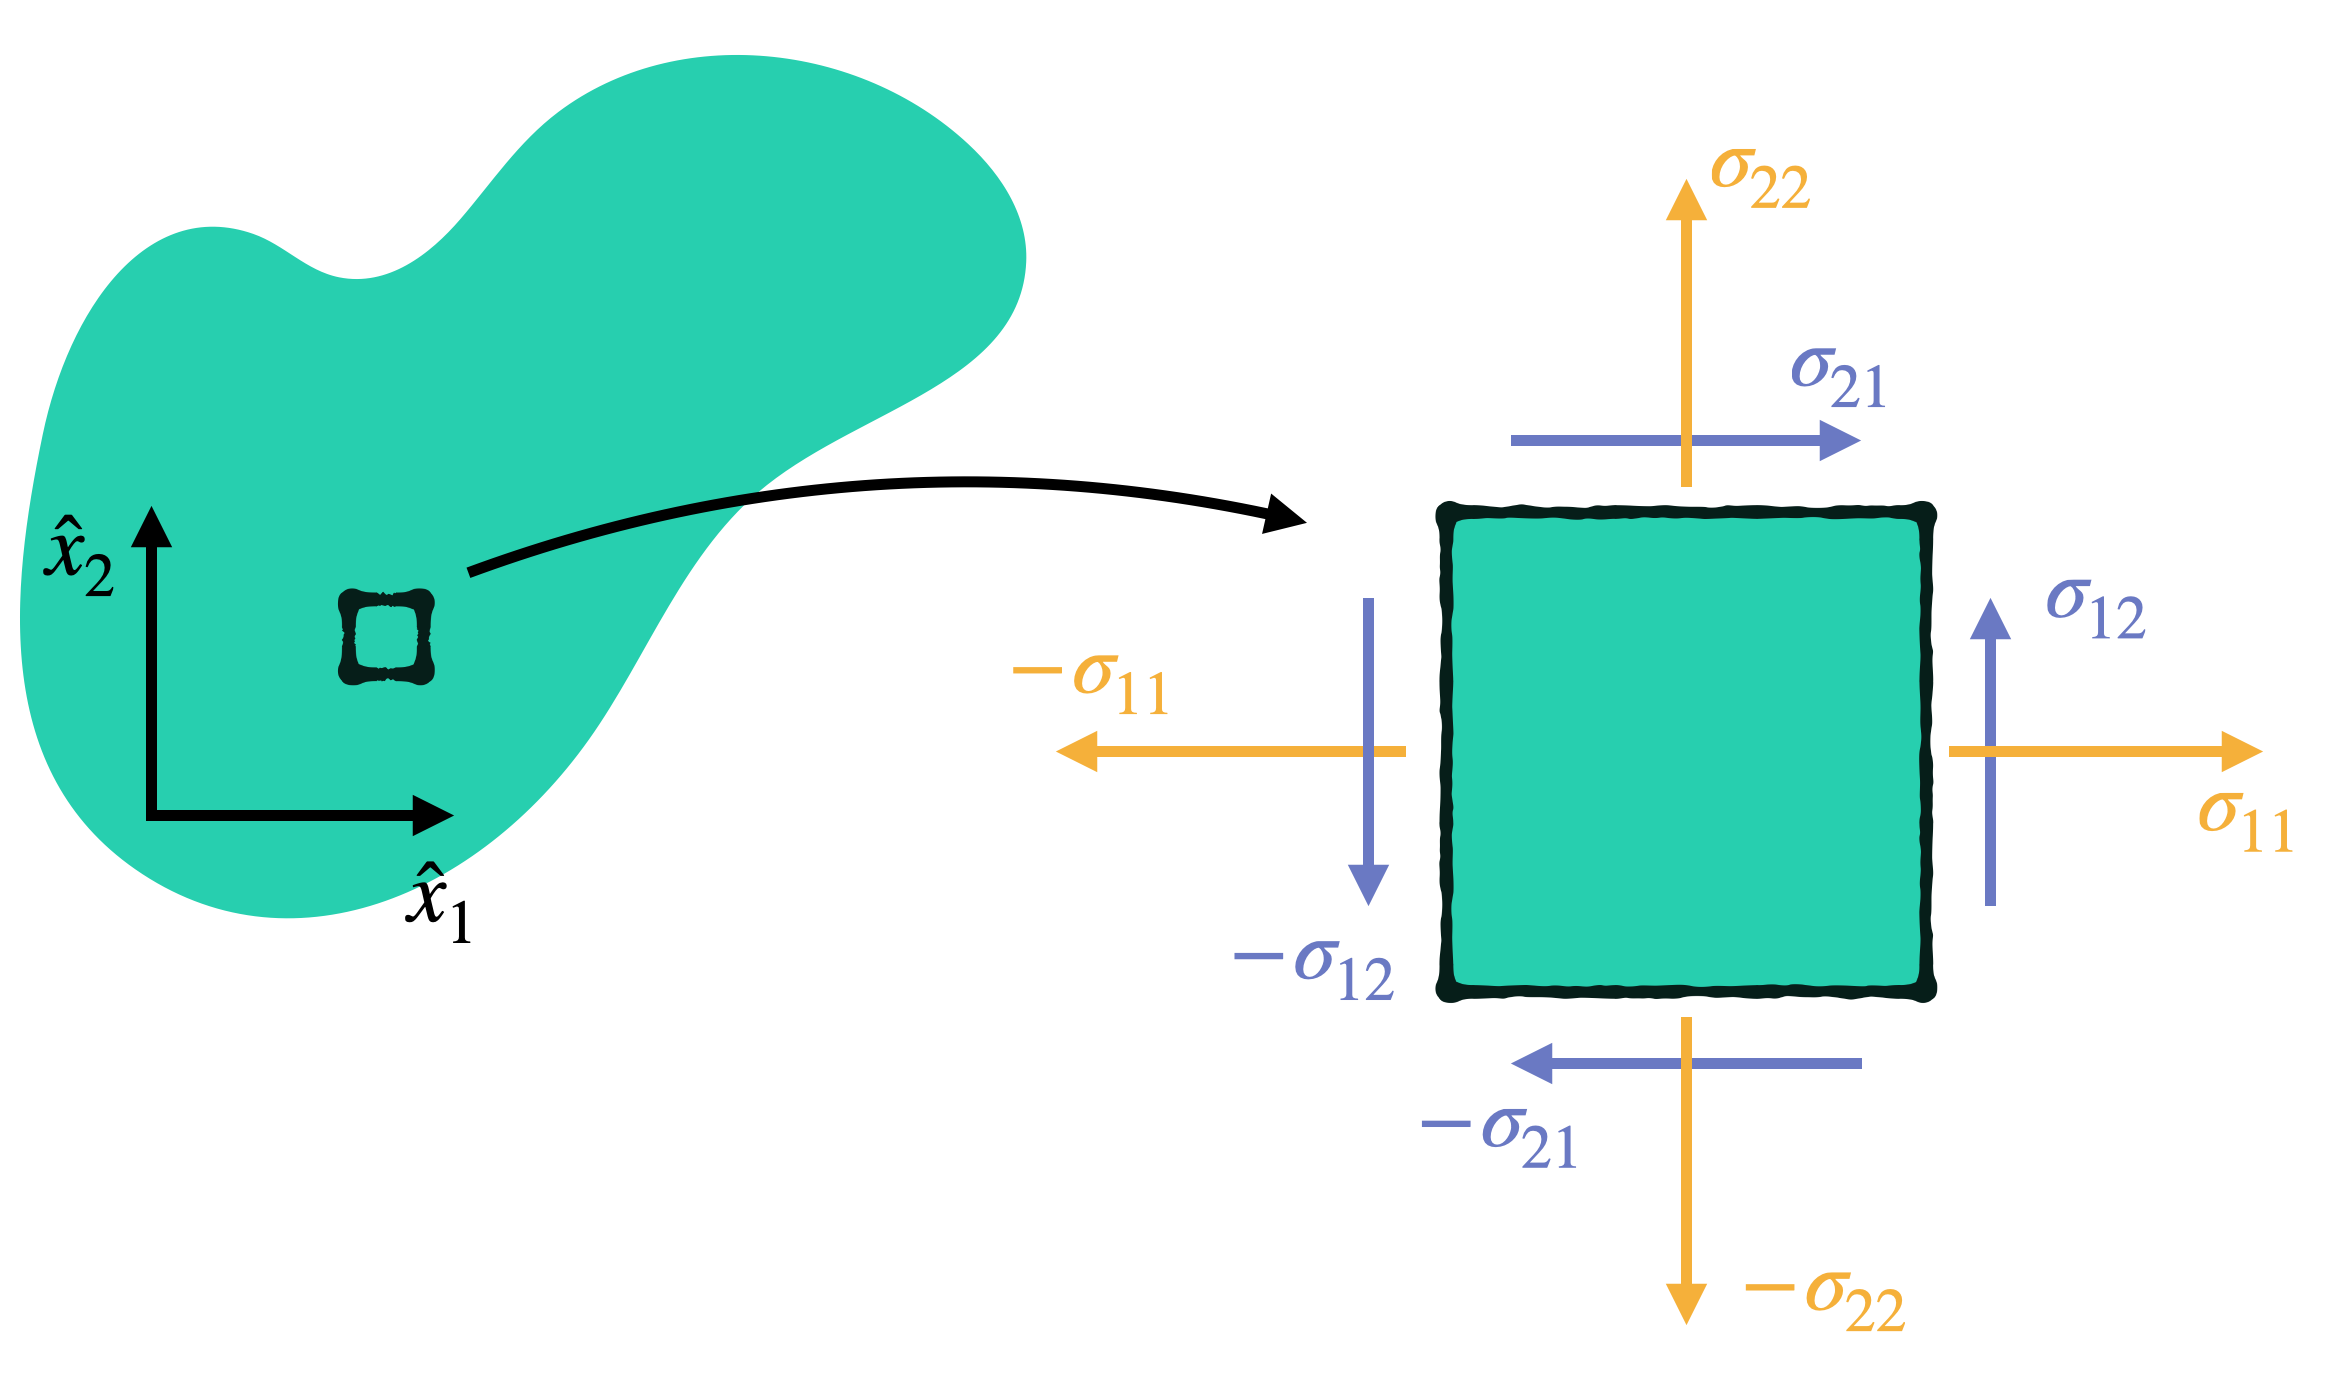

In [8]:
# Image of stress components
from IPython.display import Image
Image(filename='stresscomponents.png')

----

<a id='plots'><a>
### Bonus: Plots

**EXERCISES 4 AND 5 ARE COMPLETELY OPTIONAL.**  You may either try them or skip to the interactive question. If you've written the correct functions `epsilon` and `sigma` above, **Exercise 4** should only involve running the code cell!

**Exercise 4**

Strain and stress fields are plotted for you below, for the same values for titanium, `k=0.006`, `lam=41.3e9`, and `mu=87e9`. Assume for now that the important strain and stress components are in 2D (meaning the $\hat{x}_1$-$\hat{x}_2$ plane is the only important part) and we plot at the $\hat{x}_3 = 0$ plane. If your functions `epsilon` and `sigma` are defined correctly above, running the following cell should produce a colorplot of each **strain tensor** component

$$
\mathbf{\epsilon}_{11}, \mathbf{\epsilon}_{12}, \mathbf{\epsilon}_{21}, \mathbf{\epsilon}_{22},
$$

and each **stress tensor** component

$$
\mathbf{\sigma}_{11}, \mathbf{\sigma}_{12}, \mathbf{\sigma}_{21}, \mathbf{\sigma}_{22}.
$$

Assuming we're working in 2D, the stress components are represented in the following image. 

**a)** **Interpreting a normal stress component.** How do you **interpret physically** what you see in the colorplot about the stress component $\epsilon_{11}$ in different regions of the material?

**b)** **Interpreting a shear stress component.** How do you **interpret physically** what you see in the colorplot about the stress component $\sigma_{21}$ in different regions of the material?

---

In [9]:
###### RUN THIS CELL #######
x, y = np.linspace(0, 0.30, 10), np.linspace(0, 0.50, 10)
X, Y = np.meshgrid(x, y)
E11, E12, E21, E22 = np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape)
T11, T12, T21, T22 = np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape), np.zeros(X.shape)

for i in range(len(x)):
    for j in range(len(y)):
        ##### THIS DEPENDS ON YOUR `epsilon` AND `sigma` BEING DEFINED CORRECTLY ######
        E11[i][j] = epsilon(k=0.006, x1=X[i][j], x2=Y[i][j], x3=0)[0, 0]
        E12[i][j] = epsilon(k=0.006, x1=X[i][j], x2=Y[i][j], x3=0)[0, 1]
        E21[i][j] = epsilon(k=0.006, x1=X[i][j], x2=Y[i][j], x3=0)[1, 0]
        E22[i][j] = epsilon(k=0.006, x1=X[i][j], x2=Y[i][j], x3=0)[1, 1]
        T11[i][j] = sigma(lam=41.3e9, mu=87e9, x1=X[i][j], x2=Y[i][j], x3=0)[0, 0]
        T12[i][j] = sigma(lam=41.3e9, mu=87e9, x1=X[i][j], x2=Y[i][j], x3=0)[0, 1]
        T21[i][j] = sigma(lam=41.3e9, mu=87e9, x1=X[i][j], x2=Y[i][j], x3=0)[1, 0]
        T22[i][j] = sigma(lam=41.3e9, mu=87e9, x1=X[i][j], x2=Y[i][j], x3=0)[1, 1]
        ################################################################################
        
E = np.array([[E11, E12],
              [E21, E22]])
T = np.array([[T11, T12],
               [T21, T22]])

E_titles = [['$\epsilon_{11}$', '$\epsilon_{12}$'],
            ['$\epsilon_{21}$', '$\epsilon_{22}$']]
T_titles = [['$\sigma_{11}$', '$\sigma_{12}$'],
            ['$\sigma_{21}$', '$\sigma_{22}$']]

fig, ax = plt.subplots(2, 2, figsize=(7, 8))
for i in range(2):
    for j in range(2):
        contour = ax[i, j].contourf(X, Y, E[i, j])
        fig.colorbar(contour, ax=ax[i, j])
        ax[i, j].set_xlabel('$x_1$')
        ax[i, j].set_ylabel('$x_2$')
        ax[i, j].set_title(E_titles[i][j])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(7, 8))
for i in range(2):
    for j in range(2):
        contour = ax[i, j].contourf(X, Y, T[i, j])
        fig.colorbar(contour, ax=ax[i, j])
        ax[i, j].set_xlabel('$x_1$')
        ax[i, j].set_ylabel('$x_2$')
        ax[i, j].set_title(T_titles[i][j])
plt.tight_layout()
plt.show()

----
**a)** ... your answer here ...

**b)** ... your answer here ...

----

**Exercise 5**

Consider a **displacement field** called $\mathbf{u}(x_1, x_2, x_3)$ given by
\begin{equation*}
u_1 = k (x_1 - x_2) \\
u_2 = k x_1 x_2^2
\end{equation*}
It is plotted below. (Run the code cell.)

The resulting **spatially-varying** strain field is
\begin{equation*}
\mathbf{\epsilon} = 
\begin{bmatrix}
k x_1 & \frac{k}{2} (x_2^2 - x_2) & 0 \\
\frac{k}{2} (x_2^2 - x_2) & 2 k x_1 x_2 & 0 \\
0 & 0 & 0
\end{bmatrix}
\end{equation*}

**a)** Define the functions `epsilon(k, x1, x2, x3)` and `sigma(lam, mu, x1, x2, x3)` similar to above.

Using the same values for `k=0.006`, `lam=41.3e9`, and `mu=87e9`:

**b)** Plot the strain components $\epsilon_{ij}$, using **Exercise 4** as a guide.

**c)** Plot the stress components $\sigma_{ij}$, using **Exercise 4** as a guide.

**d)** How do you **interpret physically** what you see in the displacement field? The strain field? The stress field?

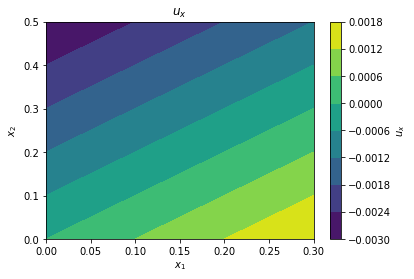

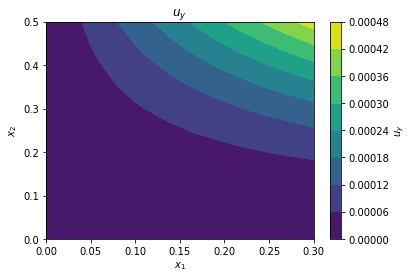

In [71]:
####### PLOT OF DISPLACEMENT FIELD #########
k = 0.006

x, y = np.linspace(0, 0.3, 12), np.linspace(0, 0.5, 12)
X, Y = np.meshgrid(x, y)

plt.plot(figsize=(3, 5))
plt.contourf(X, Y, k*(X - Y))
cbar = plt.colorbar()
cbar.set_label('$u_x$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$u_x$')
plt.show()

plt.plot(figsize=(3, 5))
plt.contourf(X, Y, k*X*Y**2)
cbar = plt.colorbar()
cbar.set_label('$u_y$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$u_y$')
plt.show()
############################################

In [10]:
# a


In [11]:
# b


In [12]:
# c


**d)**

... your answer here ...

---

#### Interactive questions

##### _Answer before submitting notebook to Moodle_ 

Run the cell below. If you don't see the questions, please make sure you are logged into both Moodle and Noto in the same browser. (May not work with private browsing.)

In [75]:
from IPython.display import IFrame
IFrame('https://moodle.epfl.ch/mod/hvp/embed.php?id=1152403', 800, 500)

##### End of notebook